## 作业：便宜蜂集团销售数据分析



### 背景介绍

总部位于北京的一家新零售连锁便利店“便宜蜂”，凭借其出色的选址分析和精准的算法推荐，通过数据高效驱动门店经营，已经成为近几年营业额增长最快的便利店。     

便宜蜂为了确定整个集团未来的额增长计划，需要建立一个数据平台，这个平台能够使它可以提前一年预测今后每个月的销售额。假如你是该零售集团的数据分析师，通过分析该集团历史销售数据，从而给老板呈现一份分析、预测和策略建议的报告。内容包含以下部分     


   
问题    

* 展示过去三年销售额时间序列图    

* 观察过去三年销售额时间序列图，总结销售额变化特点和规律    

* 预测第四年1-12月的销售额    

* 假设第四年1月份销售额为295万元，你的预测误差为多少？    



附录：近三年销售额数据

**``假设： 设定该数据集的时间为2018年1月--2020年12月``**

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# from statsmodels.tsa.stattools import adfuller
import statsmodels as sm
import statsmodels.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [63]:
data = pd.read_excel('作业数据.xlsx', sheet_name='Sheet2')
data['date'] = pd.to_datetime(data['month'])
data.set_index('date', drop=True, inplace=True)
data.drop(columns=['month'], inplace=True)

In [64]:
data

,sales
date,
2018-01-01,242
2018-02-01,235
2018-03-01,232
2018-04-01,178
2018-05-01,184
2018-06-01,140
2018-07-01,145
2018-08-01,152
2018-09-01,110


### 1. 展示过去三年销售额时间序列图

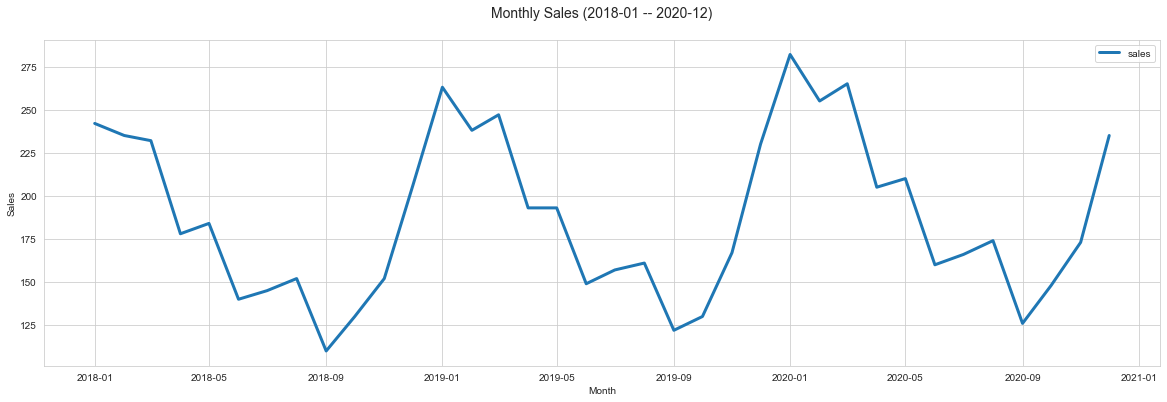

In [65]:
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x=data.index, y=data['sales'], label='sales', linewidth=3)
ax.set(ylabel='Sales', xlabel='Month')
ax.legend()
plt.title('Monthly Sales (2018-01 -- 2020-12)', fontsize=14, y=1.05)
plt.show()

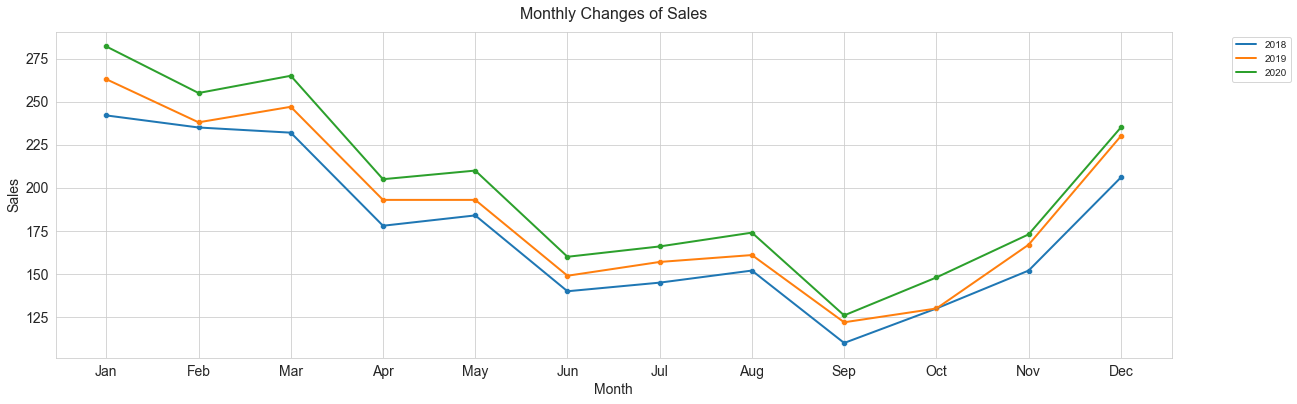

In [66]:
data['month'] = data.index.month
data['year'] = data.index.year
years = data['year'].unique()

plt.figure(figsize=(20,6))
for y in years:
    yearly_data = data[data['year'] == y]
    sns.lineplot(x='month', y='sales', data=yearly_data, label=y, linewidth=2)
    sns.scatterplot(x='month', y='sales', data=yearly_data)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Monthly Changes of Sales', fontsize=16, y=1.02)
plt.xticks(ticks=range(1, 13), 
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()

### 2. 观察过去三年销售额时间序列图，总结销售额变化特点和规律

* ``趋势性(Trend)``&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2018-2020年，整体销售额呈现上升趋势，2019年高于2018年，2020年高于2019年    
* ``季节性(Seasonality)``&nbsp;&nbsp;在每年度（12个月）内呈现季节性变化，每年1-9月份波动下降，10-12月销售额稳步提升；加法季节性特征，方差无明显变化

### 3. 预测第四年1-12月的销售额

#### 3.1 ARIMA 模型

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


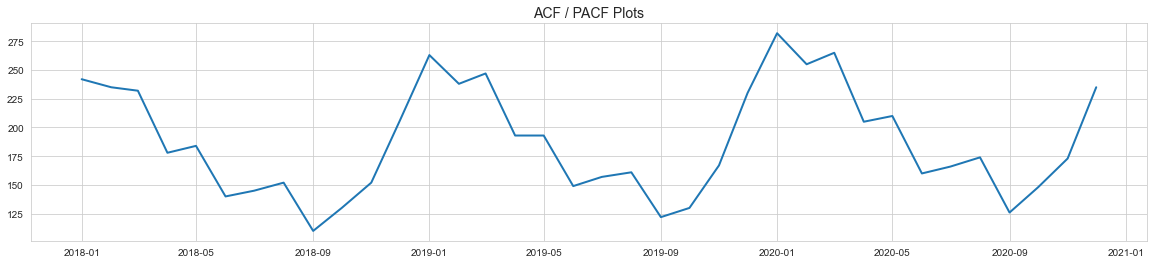

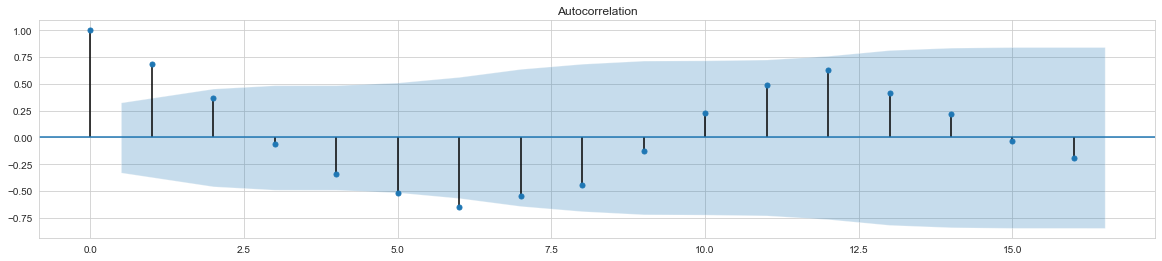

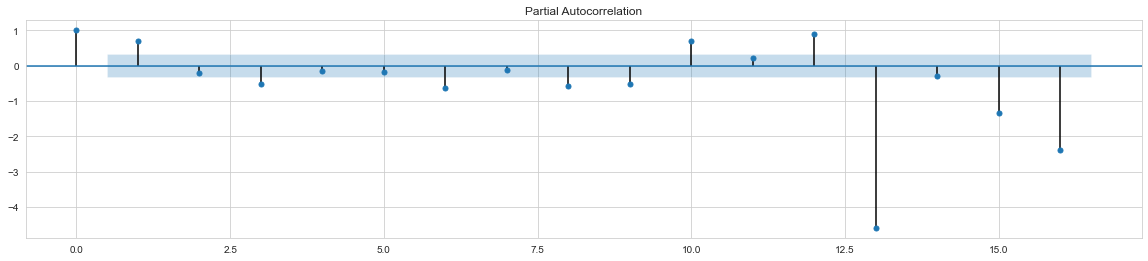

In [68]:
plt.rc("figure", figsize=(20,4))
plt.figure()
plt.title("ACF / PACF Plots", fontsize=14)

plt.plot(data.sales, linewidth=2)
smt.graphics.tsa.plot_acf(data.sales, lags=16, alpha=0.05)
smt.graphics.tsa.plot_pacf(data.sales, lags=16, alpha=0.05)
plt.show()

In [79]:
arima_model = SARIMAX(data['sales'], 
                      order=(2,0,2), 
                      seasonal_order=(0,1,1,12), 
                      enforce_stationarity=False, 
                      enforce_invertibility=False).fit(disp=-1)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [80]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                sales   No. Observations:                   36
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 12)   Log Likelihood                 -21.261
Date:                              Mon, 26 Jul 2021   AIC                             54.522
Time:                                      20:36:41   BIC                             55.705
Sample:                                  01-01-2018   HQIC                            51.968
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2912      0.795      0.366      0.714      -1.266       1.848
ar.L2          0.6186      0.728      0.849      0.396      -0.809       2.046
ma.L1         -0.4198      0.483     -0.870      0.384      -1.366       0.526
ma.L2          0.2784      0.599      0.465      0.642      -0.896       1.453
ma.S.L12      -0.5575      1.087     -0.513      0.608      -2.688       1.573
sigma2         6.1141     16.352      0.374      0.708     -25.936      38.164
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.81   Prob(JB):                         0.72
Heteroskedasticity (H):               4.21   Skew:                            -0.26
Prob(H) (two-sided):                  0.27   Kurtosis:                         1.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### 3.2 预测

In [81]:
res_index = pd.period_range(start='2021-01', end='2021-12', freq='M')
result = pd.Series(index=res_index)
result = arima_model.forecast(12)

<ipython-input-81-127cf2dde08a>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result = pd.Series(index=res_index)


In [82]:
result

2021-01-01    286.557637
2021-02-01    260.813014
2021-03-01    269.802389
2021-04-01    210.006907
2021-05-01    214.223740
2021-06-01    165.680586
2021-07-01    171.875486
2021-08-01    177.382101
2021-09-01    132.966848
2021-10-01    149.555890
2021-11-01    176.980204
2021-12-01    236.878181
Freq: MS, Name: predicted_mean, dtype: float64

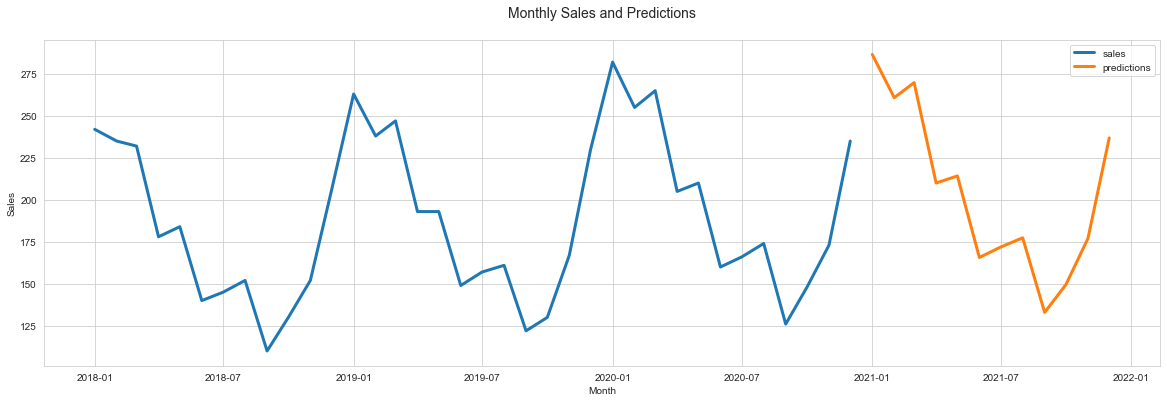

In [86]:
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x=data.index, y=data['sales'], label='sales', linewidth=3)
ax = sns.lineplot(x=result.index, y=result, label='predictions', linewidth=3)
ax.set(ylabel='Sales', xlabel='Month')
ax.legend()
plt.title('Monthly Sales and Predictions', fontsize=14, y=1.05)
plt.show()

#### 3.3 假设第四年1月份销售额为295万元，你的预测误差为多少？

In [90]:
import numpy as np
ACTUAL_JAN = 295
mae = np.abs(result[0] - ACTUAL_JAN)
rmse = np.sqrt(np.power((result[0] - ACTUAL_JAN), 2))

print('mae:', mae)
print('rmse:', rmse)

mae: 8.442362879386167
rmse: 8.442362879386167
